# Customer segmentation

# Loading data

In [1]:
import pandas as pd

df1 = pd.read_csv('cong_last_day.csv')
df2 = pd.read_csv('débit.csv')
df3 = pd.read_csv('stage_data.csv')

# Merging excel sheets tables


In [2]:
result1 = pd.merge(df3, df2[["CELL_NAME","DL_THRPUT_ALL"]], on='CELL_NAME', how='left')

In [3]:
result1.head()

,Unnamed: 0,month,day,msisdn,imei,locinfo,tot_bytes,tot_unknownbytes,tot_webbytes,tot_mailbytes,tot_chatbytes,tot_voipbytes,tot_vpnbytes,city,CELL_NAME,categorie,offer,marketing_name,DL_THRPUT_ALL
0,0,1,28,3676364895,35354629,0106f4007a445233,9292,1476,5500,0,2316,0,0,Tanger,TAN9104X,PRÉPAYÉ,BATAL,GALAXY A72,NaN
1,1,1,8,3676364895,35354629,8106f40001aa3008,11411,1192,2348,0,7871,0,0,Tanger,TAN9104_L8,PRÉPAYÉ,BATAL,GALAXY A72,1845.0
2,1,1,8,3676364895,35354629,8106f40001aa3008,11411,1192,2348,0,7871,0,0,Tanger,TAN9104_L8,PRÉPAYÉ,BATAL,GALAXY A72,2475.0
3,1,1,8,3676364895,35354629,8106f40001aa3008,11411,1192,2348,0,7871,0,0,Tanger,TAN9104_L8,PRÉPAYÉ,BATAL,GALAXY A72,2789.0
4,1,1,8,3676364895,35354629,8106f40001aa3008,11411,1192,2348,0,7871,0,0,Tanger,TAN9104_L8,PRÉPAYÉ,BATAL,GALAXY A72,1027.0


In [4]:
segm = pd.merge(result1, df1[["CELL_NAME","LTE_CONG"]], on='CELL_NAME', how='left')

In [5]:
segm.columns

Index(['Unnamed: 0', 'month', 'day', 'msisdn', 'imei', 'locinfo', 'tot_bytes',
       'tot_unknownbytes', 'tot_webbytes', 'tot_mailbytes', 'tot_chatbytes',
       'tot_voipbytes', 'tot_vpnbytes', 'city', 'CELL_NAME', 'categorie',
       'offer', 'marketing_name', 'DL_THRPUT_ALL', 'LTE_CONG'],
      dtype='object')


# Concatenating Day and Month columns

In [6]:
segm["date"]= "2023" + "/" + segm["month"].astype(str).str.zfill(2) + "/" + segm["day"].astype(str).str.zfill(2)

In [7]:
segm["date"].head()

0    2023/01/28
1    2023/01/08
2    2023/01/08
3    2023/01/08
4    2023/01/08
Name: date, dtype: object

# Dropping unecessary columns

In [8]:
new_segm = segm.drop(['month','day','CELL_NAME','imei','locinfo','offer','categorie'], axis=1)

In [9]:
segm = new_segm.drop("Unnamed: 0",axis=1)

In [10]:
segm.head()

,msisdn,tot_bytes,tot_unknownbytes,tot_webbytes,tot_mailbytes,tot_chatbytes,tot_voipbytes,tot_vpnbytes,city,marketing_name,DL_THRPUT_ALL,LTE_CONG,date
0,3676364895,9292,1476,5500,0,2316,0,0,Tanger,GALAXY A72,NaN,NaN,2023/01/28
1,3676364895,11411,1192,2348,0,7871,0,0,Tanger,GALAXY A72,1845.0,0.0,2023/01/08
2,3676364895,11411,1192,2348,0,7871,0,0,Tanger,GALAXY A72,2475.0,0.0,2023/01/08
3,3676364895,11411,1192,2348,0,7871,0,0,Tanger,GALAXY A72,2789.0,0.0,2023/01/08
4,3676364895,11411,1192,2348,0,7871,0,0,Tanger,GALAXY A72,1027.0,0.0,2023/01/08


We check if there are any duplicated data

In [11]:
segm.duplicated().sum()

2779712

In [12]:
segm.drop_duplicates(inplace=True)

In [13]:
segm

,msisdn,tot_bytes,tot_unknownbytes,tot_webbytes,tot_mailbytes,tot_chatbytes,tot_voipbytes,tot_vpnbytes,city,marketing_name,DL_THRPUT_ALL,LTE_CONG,date
0,3676364895,9292,1476,5500,0,2316,0,0,Tanger,GALAXY A72,NaN,NaN,2023/01/28
1,3676364895,11411,1192,2348,0,7871,0,0,Tanger,GALAXY A72,1845.0,0.0,2023/01/08
2,3676364895,11411,1192,2348,0,7871,0,0,Tanger,GALAXY A72,2475.0,0.0,2023/01/08
3,3676364895,11411,1192,2348,0,7871,0,0,Tanger,GALAXY A72,2789.0,0.0,2023/01/08
4,3676364895,11411,1192,2348,0,7871,0,0,Tanger,GALAXY A72,1027.0,0.0,2023/01/08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18269984,3684517731,8345021,456,3383777,0,3550924,0,0,Casablanca,REDMI NOTE 11 PRO+ 5G,18585.0,1.0,2023/01/18
18269985,3684517731,8345021,456,3383777,0,3550924,0,0,Casablanca,REDMI NOTE 11 PRO+ 5G,12065.0,1.0,2023/01/18
18269986,3684517731,8345021,456,3383777,0,3550924,0,0,Casablanca,REDMI NOTE 11 PRO+ 5G,7523.0,1.0,2023/01/18
18269987,3684517731,8345021,456,3383777,0,3550924,0,0,Casablanca,REDMI NOTE 11 PRO+ 5G,7388.0,1.0,2023/01/18


# Data Aggregation

It involves transforming data into a more organized, condensed, and structured format.

We start by filling columns starting from col2 to col8 with the sum and grouping by msisdn

In [14]:
segm['tot_bytes'] = segm.groupby('msisdn')['tot_bytes'].transform('sum')
segm['tot_unknownbytes'] = segm.groupby('msisdn')['tot_unknownbytes'].transform('sum')
segm['tot_webbytes'] = segm.groupby('msisdn')['tot_webbytes'].transform('sum')
segm['tot_mailbytes'] = segm.groupby('msisdn')['tot_mailbytes'].transform('sum')
segm['tot_chatbytes'] = segm.groupby('msisdn')['tot_chatbytes'].transform('sum')
segm['tot_voipbytes'] = segm.groupby('msisdn')['tot_voipbytes'].transform('sum')
segm['tot_vpnbytes'] = segm.groupby('msisdn')['tot_vpnbytes'].transform('sum')

Now we fill DL_THRPUT_ALL column with the mean and we group by the msisdn as well.

In [15]:
segm['DL_THRPUT_ALL'] = segm.groupby('msisdn')['DL_THRPUT_ALL'].transform('mean')

In [16]:
segm.head()

,msisdn,tot_bytes,tot_unknownbytes,tot_webbytes,tot_mailbytes,tot_chatbytes,tot_voipbytes,tot_vpnbytes,city,marketing_name,DL_THRPUT_ALL,LTE_CONG,date
0,3676364895,6867743335,2234788,871150873,3716013,230816477,961023,0,Tanger,GALAXY A72,15761.585865,NaN,2023/01/28
1,3676364895,6867743335,2234788,871150873,3716013,230816477,961023,0,Tanger,GALAXY A72,15761.585865,0.0,2023/01/08
2,3676364895,6867743335,2234788,871150873,3716013,230816477,961023,0,Tanger,GALAXY A72,15761.585865,0.0,2023/01/08
3,3676364895,6867743335,2234788,871150873,3716013,230816477,961023,0,Tanger,GALAXY A72,15761.585865,0.0,2023/01/08
4,3676364895,6867743335,2234788,871150873,3716013,230816477,961023,0,Tanger,GALAXY A72,15761.585865,0.0,2023/01/08


For city we're going to fill it with the city that has the highest tot_bytes for each client

In [17]:
max_bytes_cities = segm.groupby('msisdn')['tot_bytes'].idxmax() 
client_to_city_dict = segm.loc[max_bytes_cities, ['msisdn', 'city']].set_index('msisdn')['city'].to_dict()
segm['city'] = segm['msisdn'].map(client_to_city_dict)

Same for marketing_name

In [18]:
max_bytes_cities = segm.groupby('msisdn')['tot_bytes'].idxmax() 
client_to_city_dict = segm.loc[max_bytes_cities, ['msisdn', 'marketing_name']].set_index('msisdn')['marketing_name'].to_dict()
segm['marketing_name'] = segm['msisdn'].map(client_to_city_dict)

Same as tot_bytes, we fill LTE_CONG with the sum.

In [19]:
segm['LTE_CONG'] = segm.groupby('msisdn')['LTE_CONG'].transform('sum')

Let's convert day column to datetime type

In [20]:
segm['date'] = pd.to_datetime(segm['date'])

In [24]:
segm['date'] = segm.groupby('msisdn')['date'].transform('max')

In [25]:
segm.drop_duplicates(inplace=True)

In [26]:
segm

,msisdn,tot_bytes,tot_unknownbytes,tot_webbytes,tot_mailbytes,tot_chatbytes,tot_voipbytes,tot_vpnbytes,city,marketing_name,DL_THRPUT_ALL,LTE_CONG,date
0,3676364895,6867743335,2234788,871150873,3716013,230816477,961023,0,Tanger,GALAXY A72,15761.585865,352.0,2023-03-31
1614,3676909479,6097625472,235074,344690716,55228,50630998,410308,1863,Tanger,GALAXY A10,NaN,0.0,2023-01-08
1671,3677133801,978700629038,92662580,715165829306,1193960,34749991903,14015373745,0,Rabat,CPH1909,25634.225587,110.0,2023-03-31
12295,3686760261,1040966643,379852,171393619,0,250796527,0,0,Casablanca,GALAXY A10,24642.229599,154.0,2023-03-31
13748,3687804975,4217635210747,500844784,1524159347576,329538,63577112320,2362744093,2821830,Casablanca,HUAWEI Y7 PRIME 2019,28508.329129,156.0,2023-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18225966,4654266477,11194260,72588,9556060,13064,213409,0,0,Casablanca,HOT 10 LITE,20249.162632,22.0,2023-03-27
18227867,4664471547,2199807787871,196082018,1738432678112,29722426,31844350390,18205012883,109824,Casablanca,REDMI 9C,25534.342706,0.0,2023-03-18
18234503,4667835315,18089267226,17224212,14238542312,2183214,442196226,23920588,0,Casablanca,GALAXY A10,16551.154628,1336.0,2023-03-31
18237385,3677303145,236138979997,20812632,167263362568,4928,21467621150,8792984304,0,Marrakech,CPH1909,19948.159319,224.0,2023-03-11


# Exploratory Data Analysis 

Now we drop the msisdn since we no longer need it.

In [27]:
sgm = segm.drop("msisdn",axis=1)

In [28]:
sgm.describe()

,tot_bytes,tot_unknownbytes,tot_webbytes,tot_mailbytes,tot_chatbytes,tot_voipbytes,tot_vpnbytes,DL_THRPUT_ALL,LTE_CONG,date
count,1.253000e+03,1.253000e+03,1.253000e+03,1.253000e+03,1.253000e+03,1.253000e+03,1.253000e+03,1140.000000,1253.000000,1253
mean,7.762773e+11,2.281958e+09,3.466333e+11,6.019070e+08,3.821704e+10,2.646705e+10,1.035117e+09,20490.352590,1221.048683,2023-03-20 17:37:18.148443648
min,1.128300e+04,0.000000e+00,1.128300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4586.546875,0.000000,2023-01-01 00:00:00
25%,9.738359e+10,4.814499e+06,3.173113e+10,3.404460e+05,2.699979e+09,4.456464e+08,0.000000e+00,16792.905219,64.000000,2023-03-28 00:00:00
50%,4.611187e+11,3.603958e+07,1.703266e+11,1.179563e+07,1.634013e+10,3.937649e+09,1.535790e+05,20468.658119,419.000000,2023-03-31 00:00:00
75%,1.084871e+12,1.606412e+08,4.506908e+11,1.495677e+08,4.455657e+10,1.875647e+10,1.341186e+07,23923.988076,1696.000000,2023-03-31 00:00:00
max,7.741955e+12,3.742064e+11,3.792245e+12,7.822426e+10,1.135111e+12,2.629523e+12,6.411863e+11,40710.842302,12318.000000,2023-03-31 00:00:00
std,9.359985e+11,1.811178e+10,4.912716e+11,3.333897e+09,7.079976e+10,1.040369e+11,1.853089e+10,5387.058243,1819.246152,NaN


In [29]:
sgm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1253 entries, 0 to 18242582
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tot_bytes         1253 non-null   int64         
 1   tot_unknownbytes  1253 non-null   int64         
 2   tot_webbytes      1253 non-null   int64         
 3   tot_mailbytes     1253 non-null   int64         
 4   tot_chatbytes     1253 non-null   int64         
 5   tot_voipbytes     1253 non-null   int64         
 6   tot_vpnbytes      1253 non-null   int64         
 7   city              1253 non-null   object        
 8   marketing_name    1253 non-null   object        
 9   DL_THRPUT_ALL     1140 non-null   float64       
 10  LTE_CONG          1253 non-null   float64       
 11  date              1253 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(7), object(2)
memory usage: 127.3+ KB


Let's check the distibution of our Data set features

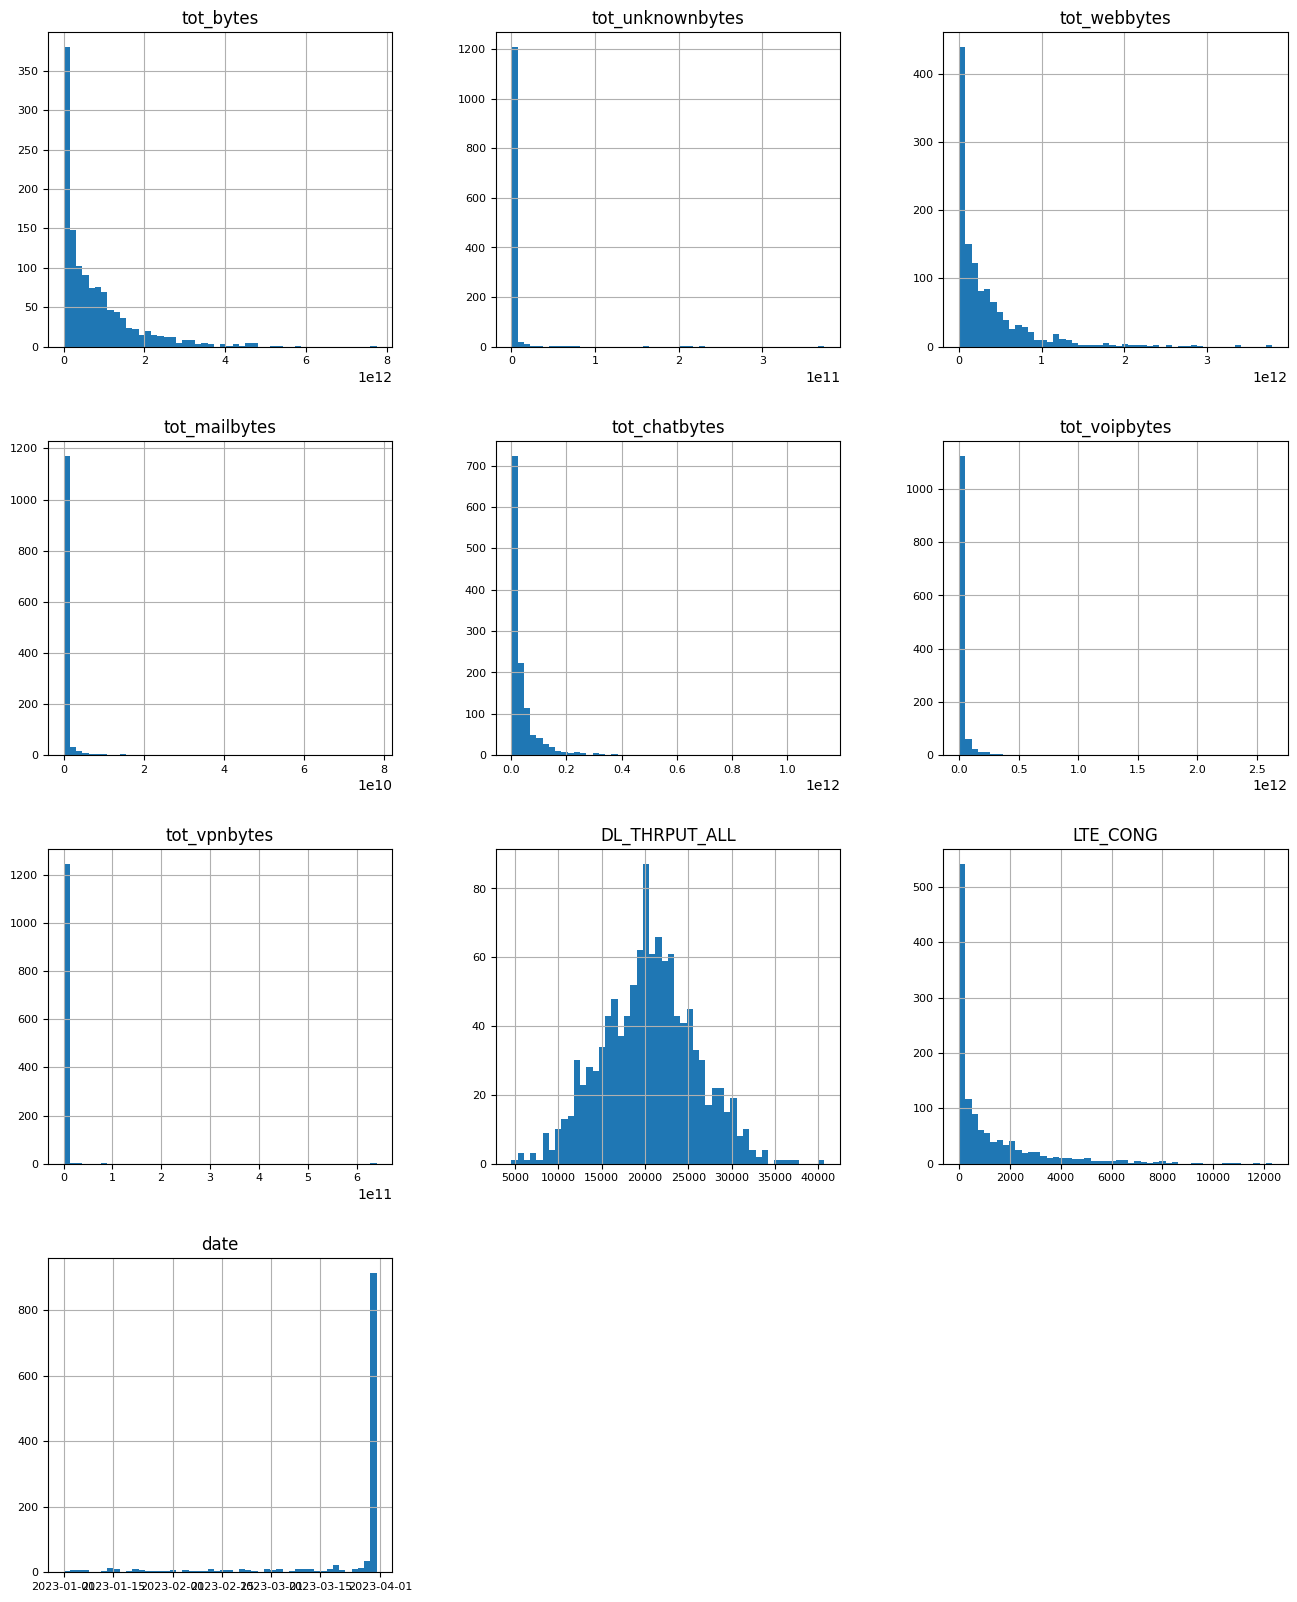

In [30]:
sgm.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8);

In [31]:
numeric_columns = sgm.select_dtypes(include='number')
numeric_columns.corr()

,tot_bytes,tot_unknownbytes,tot_webbytes,tot_mailbytes,tot_chatbytes,tot_voipbytes,tot_vpnbytes,DL_THRPUT_ALL,LTE_CONG
tot_bytes,1.000000,0.051879,0.876455,0.066739,0.456794,0.335959,0.032827,-0.058913,0.246954
tot_unknownbytes,0.051879,1.000000,0.019247,0.025824,0.033608,0.032843,0.029195,0.027736,0.037798
tot_webbytes,0.876455,0.019247,1.000000,0.059671,0.354651,0.175100,0.013905,-0.080465,0.215547
tot_mailbytes,0.066739,0.025824,0.059671,1.000000,0.036243,0.018800,0.014297,0.135145,-0.019138
tot_chatbytes,0.456794,0.033608,0.354651,0.036243,1.000000,0.213486,0.034497,-0.003257,0.144948
tot_voipbytes,0.335959,0.032843,0.175100,0.018800,0.213486,1.000000,0.011121,-0.005888,0.093510
tot_vpnbytes,0.032827,0.029195,0.013905,0.014297,0.034497,0.011121,1.000000,0.006700,0.003112
DL_THRPUT_ALL,-0.058913,0.027736,-0.080465,0.135145,-0.003257,-0.005888,0.006700,1.000000,-0.492909
LTE_CONG,0.246954,0.037798,0.215547,-0.019138,0.144948,0.093510,0.003112,-0.492909,1.000000


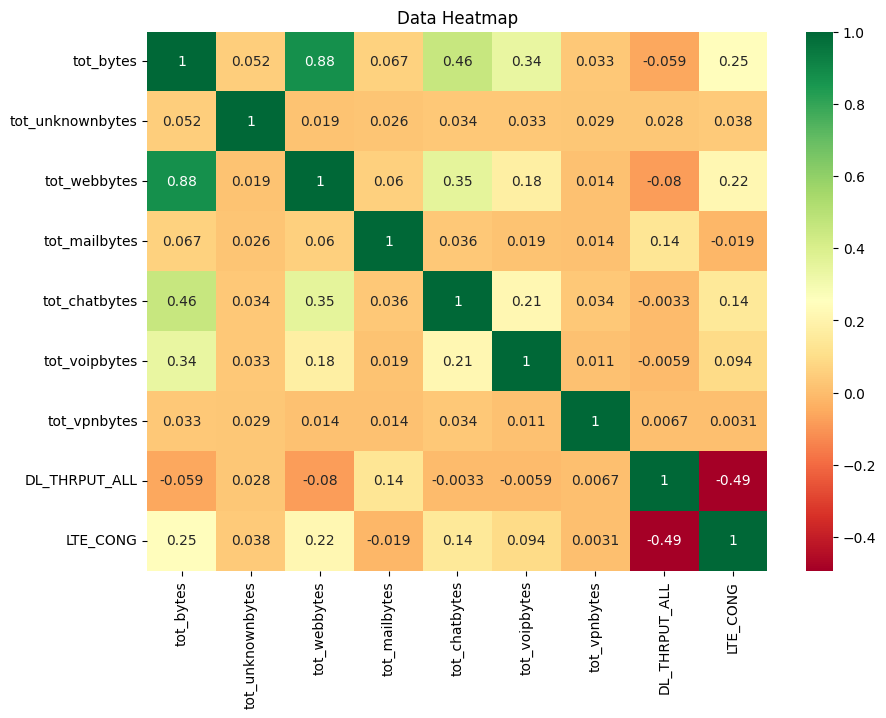

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7
                ))
sns.heatmap(numeric_columns.corr(),annot=True,cmap='RdYlGn')
plt.title('Data Heatmap')
plt.show()

# Handling Missing Values

Let's check the null values.

In [35]:
sgm.isnull().sum()

tot_bytes             0
tot_unknownbytes      0
tot_webbytes          0
tot_mailbytes         0
tot_chatbytes         0
tot_voipbytes         0
tot_vpnbytes          0
city                  0
marketing_name        0
DL_THRPUT_ALL       113
LTE_CONG              0
date                  0
dtype: int64

In [36]:
mean_value = sgm['DL_THRPUT_ALL'].mean()
sgm['DL_THRPUT_ALL'] = sgm['DL_THRPUT_ALL'].fillna(mean_value)

Let's check if there are any null values left

In [37]:
sgm.isnull().sum()

tot_bytes           0
tot_unknownbytes    0
tot_webbytes        0
tot_mailbytes       0
tot_chatbytes       0
tot_voipbytes       0
tot_vpnbytes        0
city                0
marketing_name      0
DL_THRPUT_ALL       0
LTE_CONG            0
date                0
dtype: int64

# Handling categorical Data 

In [38]:
sgm["city"].duplicated().sum()

1248

We can clearly see that there are 1248 duplicated cities out of 1253 rows so in total we have 5 cities repeated, let's confirm this.

In [39]:
num_unique_cities = sgm['city'].nunique()
city_counts = sgm['city'].value_counts()

print(f"Number of unique cities: {num_unique_cities}\n")
print("City counts:\n")
print(city_counts)

Number of unique cities: 5

City counts:

city
Casablanca    644
Tanger        264
Marrakech     160
Agadir        103
Rabat          82
Name: count, dtype: int64


In this case we can proceed with One Hot Encoder method for both categorical columns city and marketing_name.

In [40]:
one_hot_encoded_df = pd.get_dummies(sgm, columns=['city', 'marketing_name'])

In [41]:
one_hot_encoded_df

,tot_bytes,tot_unknownbytes,tot_webbytes,tot_mailbytes,tot_chatbytes,tot_voipbytes,tot_vpnbytes,DL_THRPUT_ALL,LTE_CONG,date,...,marketing_name_UC200T-GL,marketing_name_UTIME F08,marketing_name_VIVO Y11,marketing_name_VIVO Y12,marketing_name_VIVO Y19,marketing_name_VIVO Y91C,marketing_name_VNE-LX2,marketing_name_XIAOMI 11T,marketing_name_ZERO 5,marketing_name_ZTE BLADE A51
0,6867743335,2234788,871150873,3716013,230816477,961023,0,15761.585865,352.0,2023-03-31,...,False,False,False,False,False,False,False,False,False,False
1614,6097625472,235074,344690716,55228,50630998,410308,1863,20490.352590,0.0,2023-01-08,...,False,False,False,False,False,False,False,False,False,False
1671,978700629038,92662580,715165829306,1193960,34749991903,14015373745,0,25634.225587,110.0,2023-03-31,...,False,False,False,False,False,False,False,False,False,False
12295,1040966643,379852,171393619,0,250796527,0,0,24642.229599,154.0,2023-03-31,...,False,False,False,False,False,False,False,False,False,False
13748,4217635210747,500844784,1524159347576,329538,63577112320,2362744093,2821830,28508.329129,156.0,2023-03-31,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18225966,11194260,72588,9556060,13064,213409,0,0,20249.162632,22.0,2023-03-27,...,False,False,False,False,False,False,False,False,False,False
18227867,2199807787871,196082018,1738432678112,29722426,31844350390,18205012883,109824,25534.342706,0.0,2023-03-18,...,False,False,False,False,False,False,False,False,False,False
18234503,18089267226,17224212,14238542312,2183214,442196226,23920588,0,16551.154628,1336.0,2023-03-31,...,False,False,False,False,False,False,False,False,False,False
18237385,236138979997,20812632,167263362568,4928,21467621150,8792984304,0,19948.159319,224.0,2023-03-11,...,False,False,False,False,False,False,False,False,False,False


In [42]:
col22 = one_hot_encoded_df.iloc[:, 10:]
col22

,city_Agadir,city_Casablanca,city_Marrakech,city_Rabat,city_Tanger,marketing_name_103,marketing_name_A1601,marketing_name_A33F,marketing_name_A36,marketing_name_A37F,...,marketing_name_UC200T-GL,marketing_name_UTIME F08,marketing_name_VIVO Y11,marketing_name_VIVO Y12,marketing_name_VIVO Y19,marketing_name_VIVO Y91C,marketing_name_VNE-LX2,marketing_name_XIAOMI 11T,marketing_name_ZERO 5,marketing_name_ZTE BLADE A51
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1614,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1671,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12295,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13748,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18225966,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18227867,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18234503,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18237385,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Building the model

# K-Means

Steps:

- Splitting samples into initial groups using seed points. The nearest samples to these seed point will create initial clusters.

- Calculate samples distances to groups'central points (centroids) and assign the nearest samples to their cluster.

- The last step is to calculate newly created (updated) cluster centroids.

Then we repeat 2 and 3 until the algorithm converges

importing K-Means from the sklearn library.

In [43]:
from sklearn.cluster import KMeans

In order to find an appropriate number of clusters, we use the elbow method. The main purpose here is to choose the number of clusters where we see an elbow in the graph.

In [44]:
for col in one_hot_encoded_df.columns:
    if one_hot_encoded_df[col].dtype == 'uint8':
        one_hot_encoded_df[col] = one_hot_encoded_df[col].astype('int64')

In [65]:
numeric_data = one_hot_encoded_df.select_dtypes(include=['int64','float64'])

/Users/nouhailanigrou/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nouhailanigrou/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nouhailanigrou/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nouhailanigrou/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

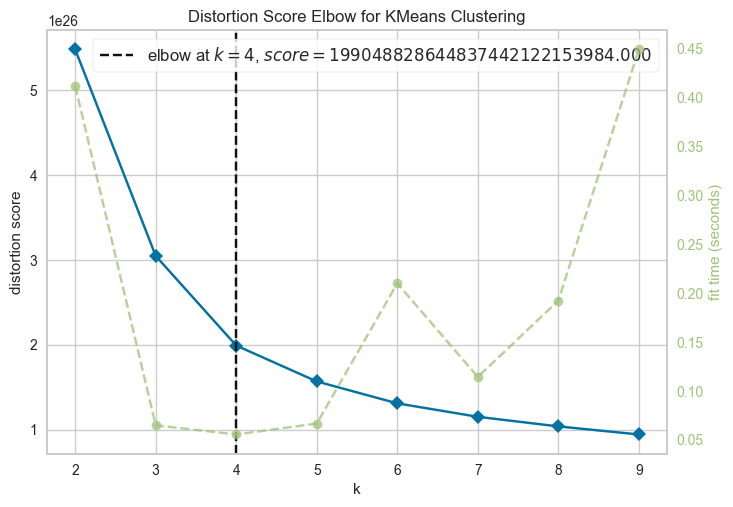

In [46]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
model = KMeans(random_state = 1)

visualizer = KElbowVisualizer(model,k=(2,10))
visualizer.fit(numeric_data)
visualizer.show()
plt.show()

Distortion score indicates the best option would be 4.

We can also plot the silouhette to help choose the number of clusters.

/Users/nouhailanigrou/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nouhailanigrou/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nouhailanigrou/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nouhailanigrou/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

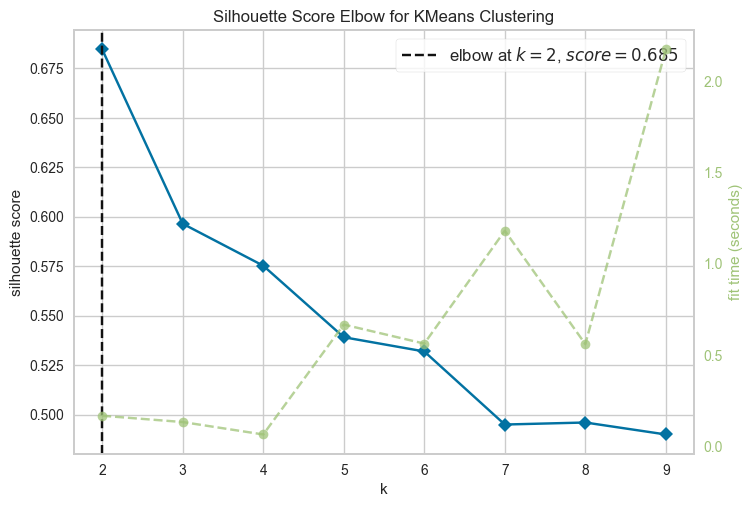

In [47]:
model = KMeans(random_state = 1)
visualizer = KElbowVisualizer(model,k=(2,10), metric='silhouette')
visualizer.fit(numeric_data)
visualizer.show()
plt.show()

Silhouette score indicates the best option would be 2

Let's compare both.

** 4 clusters **

In [48]:
X = numeric_data

In [49]:
X

,tot_bytes,tot_unknownbytes,tot_webbytes,tot_mailbytes,tot_chatbytes,tot_voipbytes,tot_vpnbytes,DL_THRPUT_ALL,LTE_CONG
0,6867743335,2234788,871150873,3716013,230816477,961023,0,15761.585865,352.0
1614,6097625472,235074,344690716,55228,50630998,410308,1863,20490.352590,0.0
1671,978700629038,92662580,715165829306,1193960,34749991903,14015373745,0,25634.225587,110.0
12295,1040966643,379852,171393619,0,250796527,0,0,24642.229599,154.0
13748,4217635210747,500844784,1524159347576,329538,63577112320,2362744093,2821830,28508.329129,156.0
...,...,...,...,...,...,...,...,...,...
18225966,11194260,72588,9556060,13064,213409,0,0,20249.162632,22.0
18227867,2199807787871,196082018,1738432678112,29722426,31844350390,18205012883,109824,25534.342706,0.0
18234503,18089267226,17224212,14238542312,2183214,442196226,23920588,0,16551.154628,1336.0
18237385,236138979997,20812632,167263362568,4928,21467621150,8792984304,0,19948.159319,224.0


# K-means Model with 4 Clusters

# Feature Scaling

We start by standardizing the data.

In [50]:
from sklearn.preprocessing import StandardScaler
scaling_model = StandardScaler()
X_std = scaling_model.fit_transform(X)

# Dimension reduction using PCA

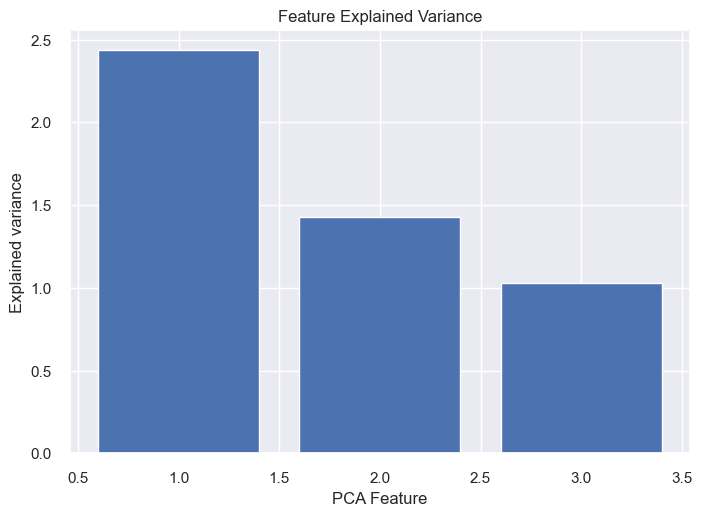

In [51]:
import matplotlib.pyplot as plt 
 
from sklearn.decomposition import PCA
sns.set()
 
pca = PCA(n_components=3)
 
pca.fit_transform(X_std)
 
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

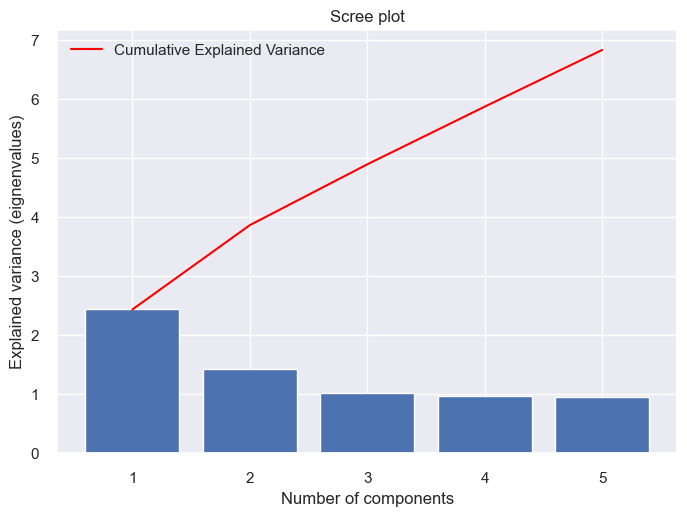

In [52]:
import numpy as np

sns.set()
 
pca = PCA(n_components=5)
 
reduced_features = pca.fit_transform(X_std)
 
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

Now we reduce the dataset dimensions to get rid of the noises and keep only the uncorrelated features in order to make a faster model.

In [53]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_std) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,-1.176362,-0.762391
1,-1.371482,-0.006591


Now we're ready to fit our model.

In [54]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_principal)

/Users/nouhailanigrou/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

Let's visualize our clusters.

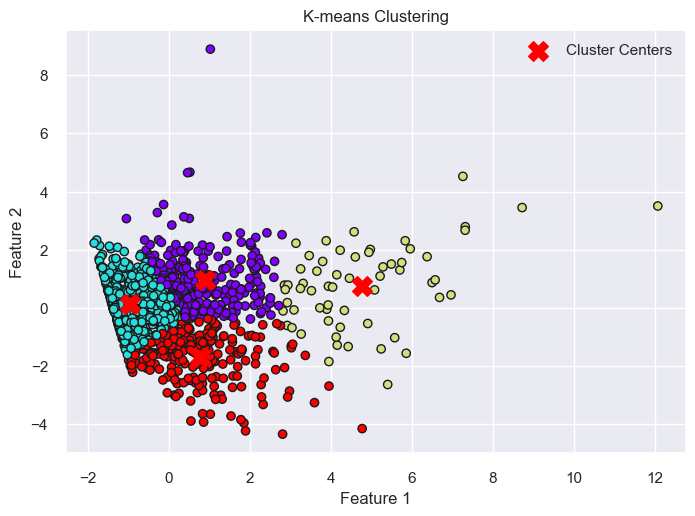

In [55]:
cluster_centers = kmeans.cluster_centers_

cluster_labels = kmeans.labels_

plt.scatter(X_principal['P1'], X_principal['P2'], c=cluster_labels, cmap='rainbow', edgecolors='k')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.legend()
plt.show()

Instead of re-implementing the algorithm with 2 clusters we can Calculate the silhoutte score for clusters in range (2,5) which means we implement the code for 2, 3 and 4 clusters, we calculate the average silhouette and then choose the k-value that gives the highest silhoutte.

# Checking silhouette scores with different clusters

n_clusters = 2 -------> The average silhouette_score is: 0.49194440848982934
n_clusters = 3 -------> The average silhouette_score is: 0.45018312267667765
n_clusters = 4 -------> The average silhouette_score is: 0.4418919775486809


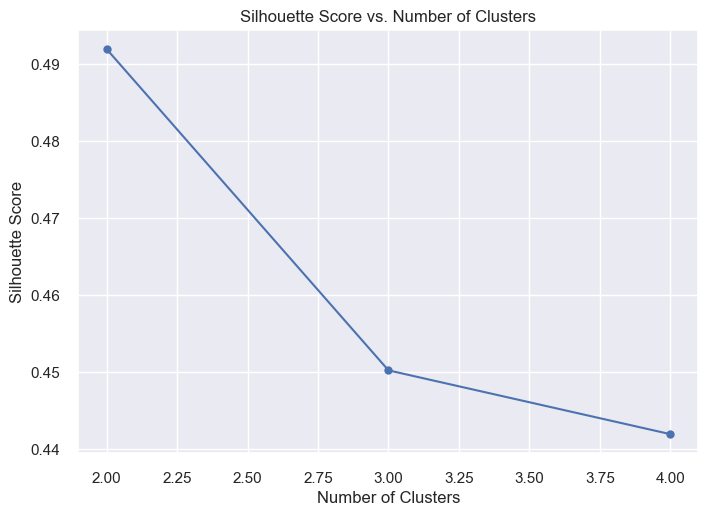

In [56]:
from sklearn.metrics import silhouette_score

x = list(range(2, 5))
y_std = []

for n_clusters in x:
    
    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
    kmeans.fit(X_principal)
    clusters = kmeans.predict(X_principal)
    silhouette_avg = silhouette_score(X_principal, clusters)
    y_std.append(silhouette_avg)
    print("n_clusters =", n_clusters,"------->","The average silhouette_score is:", silhouette_avg)

plt.plot(x, y_std, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


It is now clear that the number of clusters suitable for our case is 2.

In [57]:
kmeans = KMeans(n_clusters=2)
cluster_labels = kmeans.fit_predict(X_principal)

X_principal["Cluster"] = cluster_labels

/Users/nouhailanigrou/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [79]:
X["Cluster"] = cluster_labels

In [59]:
segm["Cluster"] = cluster_labels

In [62]:
X_principal

,P1,P2,Cluster
0,-1.176362,-0.762391,1
1,-1.371482,-0.006591,1
2,0.141068,1.083183,1
3,-1.468623,0.511968,1
4,3.137323,2.221095,0
...,...,...,...
1248,-1.365477,-0.047626,1
1249,2.031614,1.546033,0
1250,-1.017479,-0.958296,1
1251,-0.844224,-0.015781,1


# Guassian Mixture Model

In [69]:
G = numeric_data

In [70]:
G.head()

,tot_bytes,tot_unknownbytes,tot_webbytes,tot_mailbytes,tot_chatbytes,tot_voipbytes,tot_vpnbytes,DL_THRPUT_ALL,LTE_CONG
0,6867743335,2234788,871150873,3716013,230816477,961023,0,15761.585865,352.0
1614,6097625472,235074,344690716,55228,50630998,410308,1863,20490.352590,0.0
1671,978700629038,92662580,715165829306,1193960,34749991903,14015373745,0,25634.225587,110.0
12295,1040966643,379852,171393619,0,250796527,0,0,24642.229599,154.0
13748,4217635210747,500844784,1524159347576,329538,63577112320,2362744093,2821830,28508.329129,156.0


In [71]:
from sklearn.mixture import GaussianMixture 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [72]:
#Standardize the data 
scaler = StandardScaler()
scaled_df = scaler.fit_transform(G)

#Normalizing the Data
normalized_df = normalize(scaled_df)

normalized_df = pd.DataFrame(normalized_df)

# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,-0.429247,-0.673954
1,-0.737484,-0.177828


# Bayesian Information Criterion (BIC)

this criterian will give us an estimation on how much is good the GMM in terms of prediction the data we actually have. The lower is the BIC, the better is the modelto actually predict the data we have. In this case we're going to use it in order the choose the number of components to use in our model.

In [73]:
num_components_list = [1, 2, 3, 4, 5]

bic_values = []

for num_components in num_components_list:
    gmm = GaussianMixture(n_components=num_components, random_state=42)
    gmm.fit(X_principal)
    bic_values.append(gmm.bic(X_principal))

best_model_idx = np.argmin(bic_values)

optimal_num_components = num_components_list[best_model_idx]

print("Optimal number of components (clusters) according to BIC:", optimal_num_components)


Optimal number of components (clusters) according to BIC: 5


In [74]:
gmm = GaussianMixture(n_components=5)
gmm.fit(X_principal)

GaussianMixture(n_components=5)

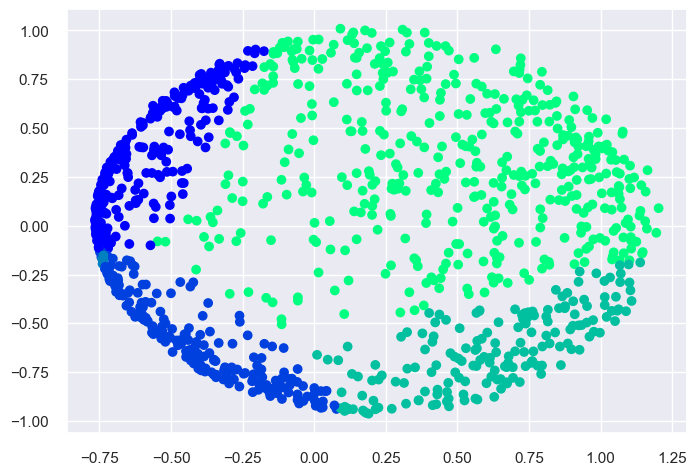

In [75]:
#Visualizing the clusters
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = GaussianMixture(n_components=5).fit_predict(X_principal), cmap=plt.cm.winter)
plt.show()

In [76]:
cluster_probs = gmm.predict_proba(X_principal)
clus_label = gmm.predict(X_principal)


df = pd.DataFrame(np.column_stack([X_principal, cluster_probs, clus_label]), 
                  columns=['P1', 'P2', 'Prob_Cluster_0', 'Prob_Cluster_1','Prob_Cluster_2','Prob_Cluster_3','Prob_Cluster_4', 'Cluster_Label'])
df

,P1,P2,Prob_Cluster_0,Prob_Cluster_1,Prob_Cluster_2,Prob_Cluster_3,Prob_Cluster_4,Cluster_Label
0,-0.429247,-0.673954,2.114486e-06,0.000000e+00,0.001017,9.989804e-01,1.147586e-15,3.0
1,-0.737484,-0.177828,5.484758e-23,9.997570e-01,0.000001,1.915809e-04,5.032575e-05,1.0
2,0.184421,0.909342,1.001905e-30,0.000000e+00,0.999999,6.206597e-86,7.927488e-07,2.0
3,-0.720077,0.262186,2.537401e-31,0.000000e+00,0.009588,2.208855e-07,9.904120e-01,4.0
4,0.815170,0.694231,3.924722e-14,0.000000e+00,1.000000,2.960500e-122,1.707794e-40,2.0
...,...,...,...,...,...,...,...,...
1248,-0.729242,-0.210301,1.602919e-18,2.463903e-20,0.003654,8.992843e-01,9.706203e-02,3.0
1249,0.726973,0.644664,3.305934e-14,0.000000e+00,1.000000,3.163786e-109,1.707071e-36,2.0
1250,-0.342855,-0.776324,1.920559e-04,0.000000e+00,0.001071,9.987366e-01,1.250347e-21,3.0
1251,-0.680814,-0.206696,1.466354e-17,0.000000e+00,0.006528,9.446141e-01,4.885792e-02,3.0


# Cluster validity

To compare which clustering algorithm is best for our model, we use silhoutte score method to choose the best clustering algorithm.

In [77]:
def silhouette_method(df,algo,y_pred):
  print('=================================================================================')
  print('Clustering ',algo," : silhouette score : ",silhouette_score(df,y_pred) )


silhouette_method(X,' : KMeans',cluster_labels)
silhouette_method(G,' : GaussianMixture',clus_label)
print('=================================================================================')

Clustering   : KMeans  : silhouette score :  0.5316545700120104
Clustering   : GaussianMixture  : silhouette score :  -0.17524637669135082


From the above analysis,we saw that "K-Means" algorithm has high silhouette score as compared to others. So we'll apply K-Means algorithm for our model.

# k-Means CLusters visualization

/Users/nouhailanigrou/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


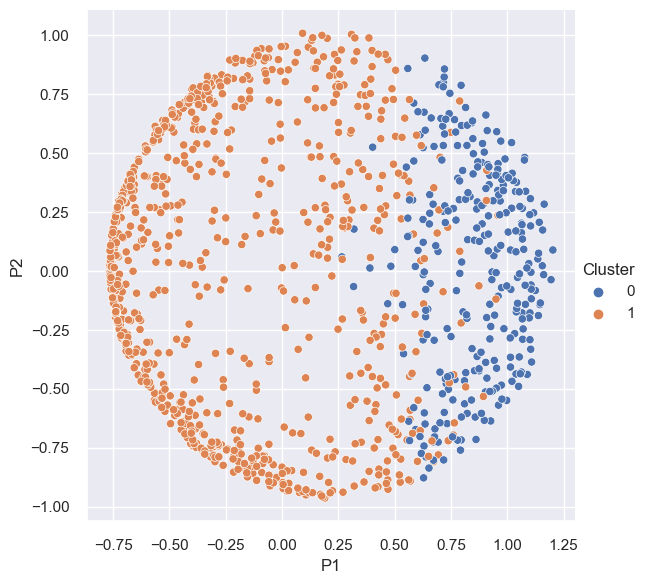

In [80]:
sns.relplot(
    x="P1", y="P2", hue="Cluster", data=X_principal, height=6,);

3D visualization

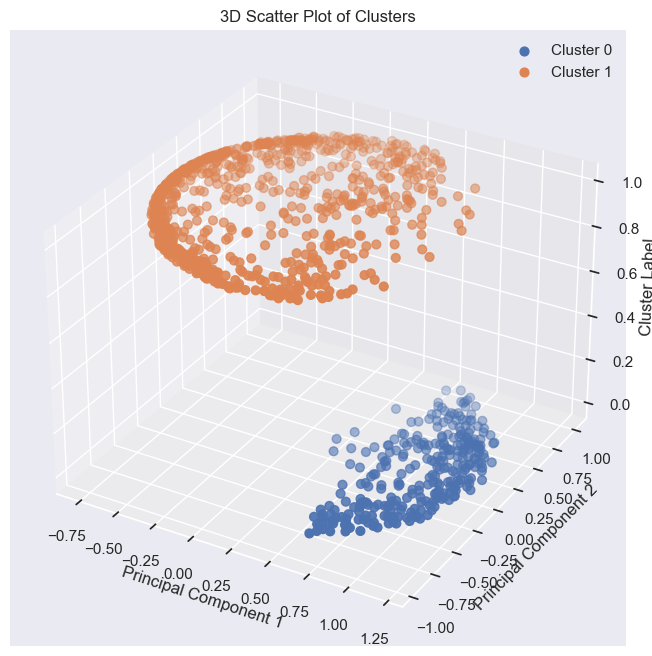

In [81]:
num_clusters = 2

X_3d = np.column_stack((X_principal, cluster_labels))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(num_clusters):
    cluster_data = X_3d[X_3d[:, 2] == i]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], s=40, label=f'Cluster {i}', marker='o')

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Cluster Label")
ax.set_title("3D Scatter Plot of Clusters")
ax.legend()

plt.show()

#  Evaluating the Model

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

First let's have a look at the group distribution of clustering.

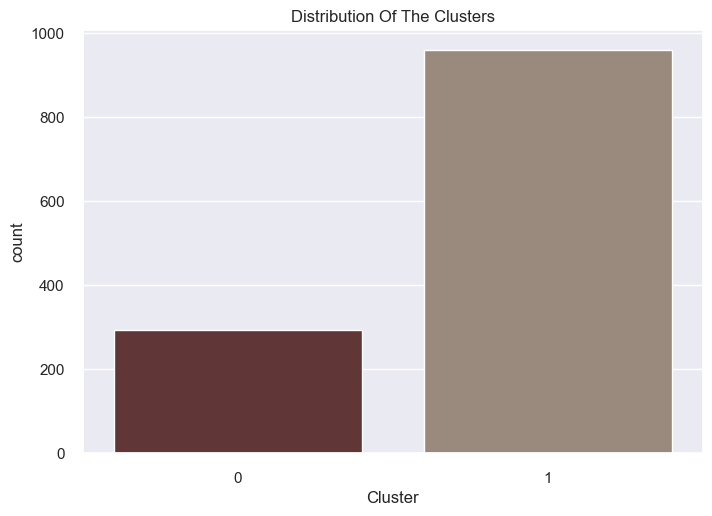

In [82]:
pal = ["#682F2F","#9F8A78","#F3AB60"]
pl = sns.countplot(x=X["Cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

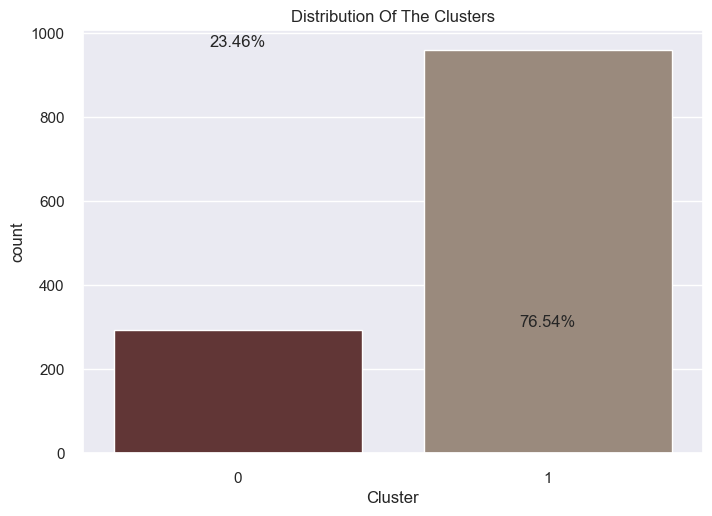

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt


cluster_counts = X["Cluster"].value_counts()

total_clients = len(X)

cluster_percentages = (cluster_counts / total_clients) * 100

pl = sns.countplot(x=X["Cluster"], palette=pal)
pl.set_title("Distribution Of The Clusters")

for i, count in enumerate(cluster_counts):
    pl.annotate(f'{cluster_percentages[i]:.2f}%', xy=(i, count), ha='center', va='bottom')

plt.show()


The clusters seem to be not fairly distributed. Cluster 1 has the most clients.

/var/folders/m8/jc8mgx2s41b132cm_njvbmmc0000gn/T/ipykernel_55405/1318868150.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  pl = sns.scatterplot(data = X,x=X["LTE_CONG"], y=X["tot_bytes"],hue=X["Cluster"], palette= pal)


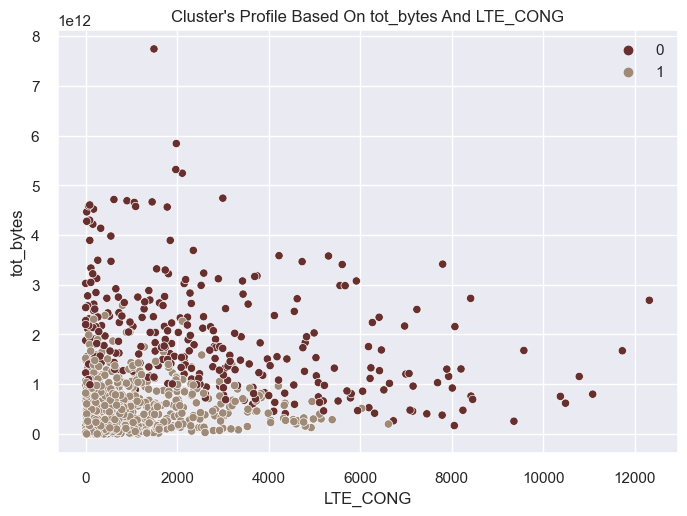

In [84]:
pl = sns.scatterplot(data = X,x=X["LTE_CONG"], y=X["tot_bytes"],hue=X["Cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On tot_bytes And LTE_CONG")
plt.legend()
plt.show()

 *Tot_bytes vs LTE_CONG shows the clusters pattern*
   - Group 0: High LTE & High tot_bytes
   - Group 1: Low LTE & Low tot_bytes

/var/folders/m8/jc8mgx2s41b132cm_njvbmmc0000gn/T/ipykernel_55405/388814297.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  pl = sns.scatterplot(data = X,x=X["DL_THRPUT_ALL"], y=X["LTE_CONG"],hue=X["Cluster"], palette= pal)


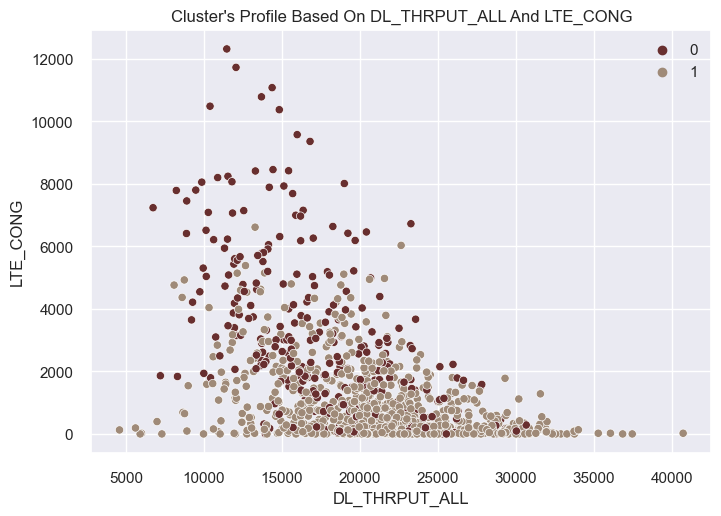

In [85]:
pl = sns.scatterplot(data = X,x=X["DL_THRPUT_ALL"], y=X["LTE_CONG"],hue=X["Cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On DL_THRPUT_ALL And LTE_CONG")
plt.legend()
plt.show()

 *DL_THRPUT_ALL vs LTE_CONG shows the clusters pattern*
   - Group 0: High LTE & Low DL_THRPUT_ALL
   - Group 1: Low LTE & High DL_THRPUT_ALL

# Profiling


Now that we've formed the clusters and the impact of our most important features, let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the company.

To decide that, I will be plotting some of the city of the customers. On the basis of the outcomes, I will be arriving at the conclusions.

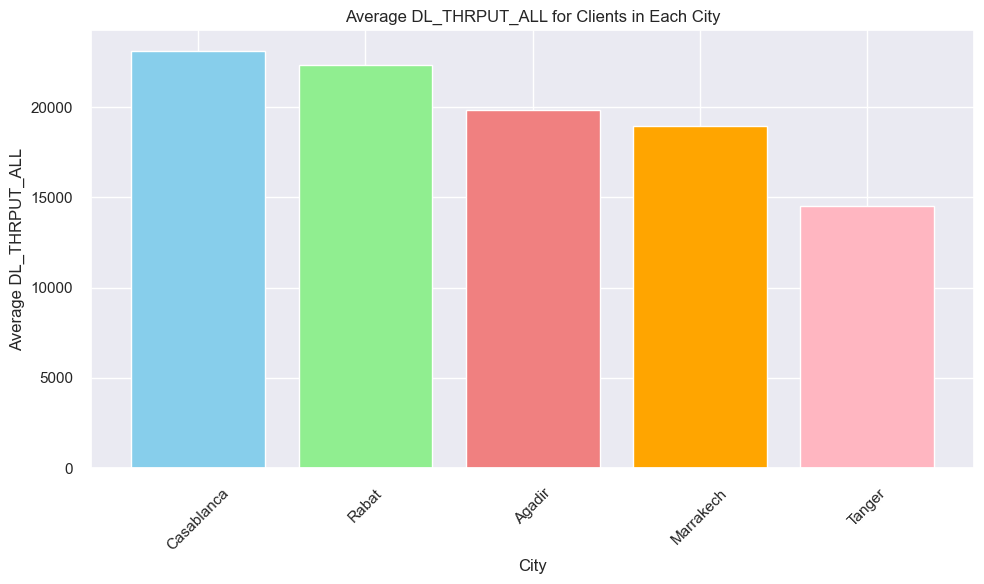

In [92]:
average_DL_by_city = segm.groupby('city')['DL_THRPUT_ALL'].mean()

average_DL_by_city = average_bytes_by_city.sort_values(ascending=False)

custom_colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink']

plt.figure(figsize=(10, 6))
plt.bar(average_DL_by_city.index, average_DL_by_city.values, color=custom_colors)
plt.xlabel('City')
plt.ylabel('Average DL_THRPUT_ALL')
plt.title('Average DL_THRPUT_ALL for Clients in Each City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


CLients from Tangier city have had the lowet DL_THRPUT_ALL let's city if it makes sense after checking the LTE_CONG.

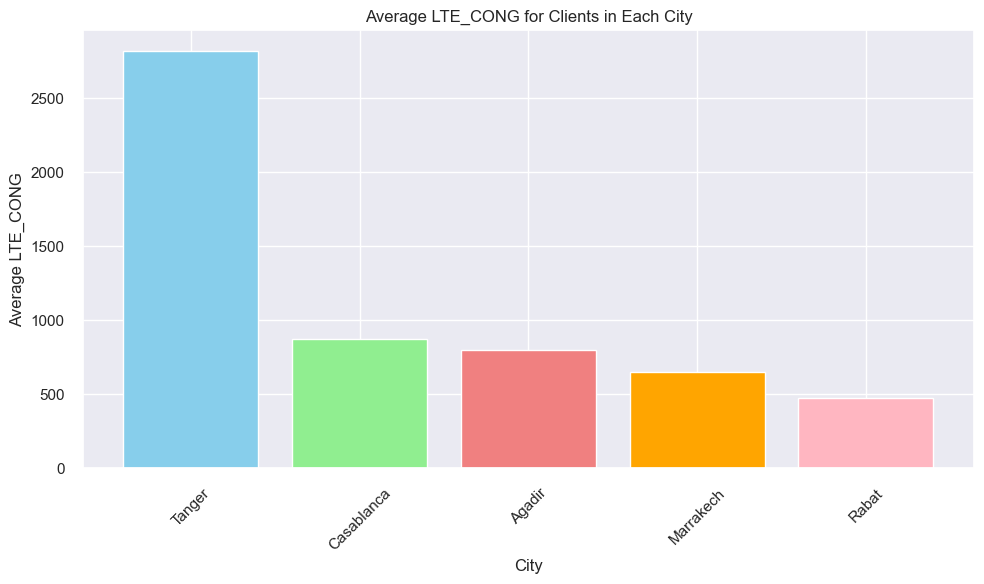

In [94]:
average_CONG_by_city = segm.groupby('city')['LTE_CONG'].mean()

average_CONG_by_city = average_CONG_by_city.sort_values(ascending=False)

custom_colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink']

plt.figure(figsize=(10, 6))
plt.bar(average_CONG_by_city.index, average_CONG_by_city.values, color=custom_colors)
plt.xlabel('City')
plt.ylabel('Average LTE_CONG')
plt.title('Average LTE_CONG for Clients in Each City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We can clearly see that clients from Tangier city have had the highest LTE_CONG which explains the last vizualisation.

# Conclusion

In light of the comprehensive analysis conducted, it is evident that clients belonging to cluster 1, with a significant representation from Tangier, require a heightened level of attention. By focusing the efforts on understanding and addressing the specific requirements of this cluster, we can enhance customer satisfaction, loyalty, and overall business success.

# Deploying the Model

Creating a pickle file.

In [95]:
import joblib 
pickle_out = open("clustering.pkl","wb")
joblib.dump(kmeans, pickle_out)
pickle_out.close()

Saving the scaling and dimension reduction models and the one hot encoding model as well.

In [96]:
with open('scaling_model.pkl', 'wb') as file:
    joblib.dump(scaling_model, file)

with open('pca.pkl', 'wb') as file:
    joblib.dump(pca, file)


In [97]:
pickle_file_path = "one_hot_encoded_df.pkl"

with open(pickle_file_path, "wb") as file:
    joblib.dump(one_hot_encoded_df, file)